# Using InSegt for dictionary-based segmentation of nerves images

InSegt-py is a py version of [InSegt](https://github.com/vedranaa/InSegt). Basic variant of InSegt is described in our paper [Content-based Propagation of User Markings for Interactive Segmentation of Patterned Images](http://openaccess.thecvf.com/content_CVPRW_2020/papers/w57/Dahl_Content-Based_Propagation_of_User_Markings_for_Interactive_Segmentation_of_Patterned_CVPRW_2020_paper.pdf), CVPRW 2020. But InSegt has evolved, so please check the demos and notebooks for the updated version.

This is a example of interactive image segmentation with InSegt. Here we usa a model which builds dictionay by clustering image features in a k-means tree. For features we use Gaussian derivatives, where we use a few different values for the standard deviation of the Gaussian kernel. Furthermore, the model is made multi-scale by building and including sub-models operating on a downscaled version of the input image. 

In this example we use slices from volumetric images of peripheral nerves. The study of the data is described in the article [Three-dimensional architecture of human diabetic peripheral nerves revealed by X-ray phase contrast holographic nanotomography](https://www.nature.com/articles/s41598-020-64430-5?utm_source=other&utm_medium=other&utm_content=null&utm_campaign=JRCN_2_LW01_CN_SCIREP_article_paid_XMOL), Scientific Reports 2020.

## Import packages
Most importantly, you need `insegt` and `insegtpy.models`. You also need to be able to read in the image (for example using `PIL`), and show the result (for example using `matplotlib`).

In [1]:
import insegtpy
import insegtpy.models
import PIL
import numpy as np
import urllib.request  # for getting the image from the data repository
import matplotlib.pyplot as plt

%matplotlib notebook

## Load the image 

Get the image from our data repository. Alternatively, load the image from your computer.

In [2]:
url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/NT2_0001.png'
image = np.array(PIL.Image.open(urllib.request.urlopen(url)))

# # Check the path and load the image locally
# image0 = np.array(PIL.Image.open('../data/NT2_0001.png'))

print(f'Image size is {image.shape}')
print(f'Image type is {image.dtype}')

Image size is (1024, 1024)
Image type is uint8


## Build the model
For this model we use a km-tree with branching factor 25 and 3 layers. Gaussian features are computed using Gaussian kernels of four different standard deviatioons. 40000 feature vectors have been extracted to train the model. When propagating user labelings we use a 9x9 kernel. Finaly, for multiscale feature the model incudes a submodel build on a image resized with factor 0.5 and 0.25.

In [3]:
model = insegtpy.models.gauss_features_segmentor(image, 
                                   branching_factor = 12, 
                                   number_layers = 4,
                                   number_training_vectors = 50000,
                                   features_sigma = [1,2,4,8], 
                                   propagation_size = 15, 
                                   scales = [1, 0.7, 0.5])

Bulding multi-scale GaussFeatSegt model.
Number of images 1
Number of training patches 50000
Number of layers 4 number of elements 22620
Number of images 1
Number of training patches 50000
Number of layers 4 number of elements 22620
Number of images 1
Number of training patches 50000
Number of layers 4 number of elements 22620


# Use the model

This notebook demonstrates three ways of uing segmentatiton model:
 - (A) Using the segmantation model with an interactive annotator. 
 - (B) Using interactive annotator, but loading an annotation saved in a previous session, so you don't need to start from scratch every time. 
 - (C) Using segmentation model in a non-interactive manner. 

The code below shows all three ways of using the model. You can choose to run only one of the three blocks of code. The code for the two versions of the interactive use is commented out, such that running all cells does not require interaction.

### (A) Interactive use
This will launch an InSegt window, where you may anotate the features of interest. We suggest that you fully anotate a small part of the image surounding one or two nerve cells. For on-screen help when using InSegt, hold ´H´. When you are sattisfied with the resulting segmentation, close InSegt window. You will be able to access the segmentation result via InSegt object. 

In [4]:
# ex = insegtpy.insegt(image, model)


You can get the segmentation from the probabilities attribute of the interactive annotator. (Alternatively, you can always get the probabilities and the segmentation by passing the image to the model, as shown for the non-interactive use.)

In [5]:
# seg = insegtpy.utils.segment_probabilities(ex.probabilities) 

### (B) Interactive use with labeling
If you have a labeling, for example from a previous interactive session, you can load in in the interactive annotator.



In [6]:
# url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/NT2_0001_labels.png'
# labels = np.array(PIL.Image.open(urllib.request.urlopen(url)))
# ex = insegtpy.insegt(image, model, labels=labels)

Again, getting the hold of image segmentation from the probabilities.

In [7]:
# seg = insegtpy.utils.segment_probabilities(ex.probabilities) 

### (C) Non-interactive use
The segmentation model may also be used non-interactively. For this you need a labeling, for example from an interactive session. The model is updated (trained) by passing the labels to the model. The model returns the probabilities.

In [8]:
url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/NT2_0001_labels.png'
labels = np.array(PIL.Image.open(urllib.request.urlopen(url)))
seg = insegtpy.utils.segment_probabilities(model.process(labels))

## Test on another (similar) image

You can also use the learned model to segment another similar image.

<IPython.core.display.Javascript object>


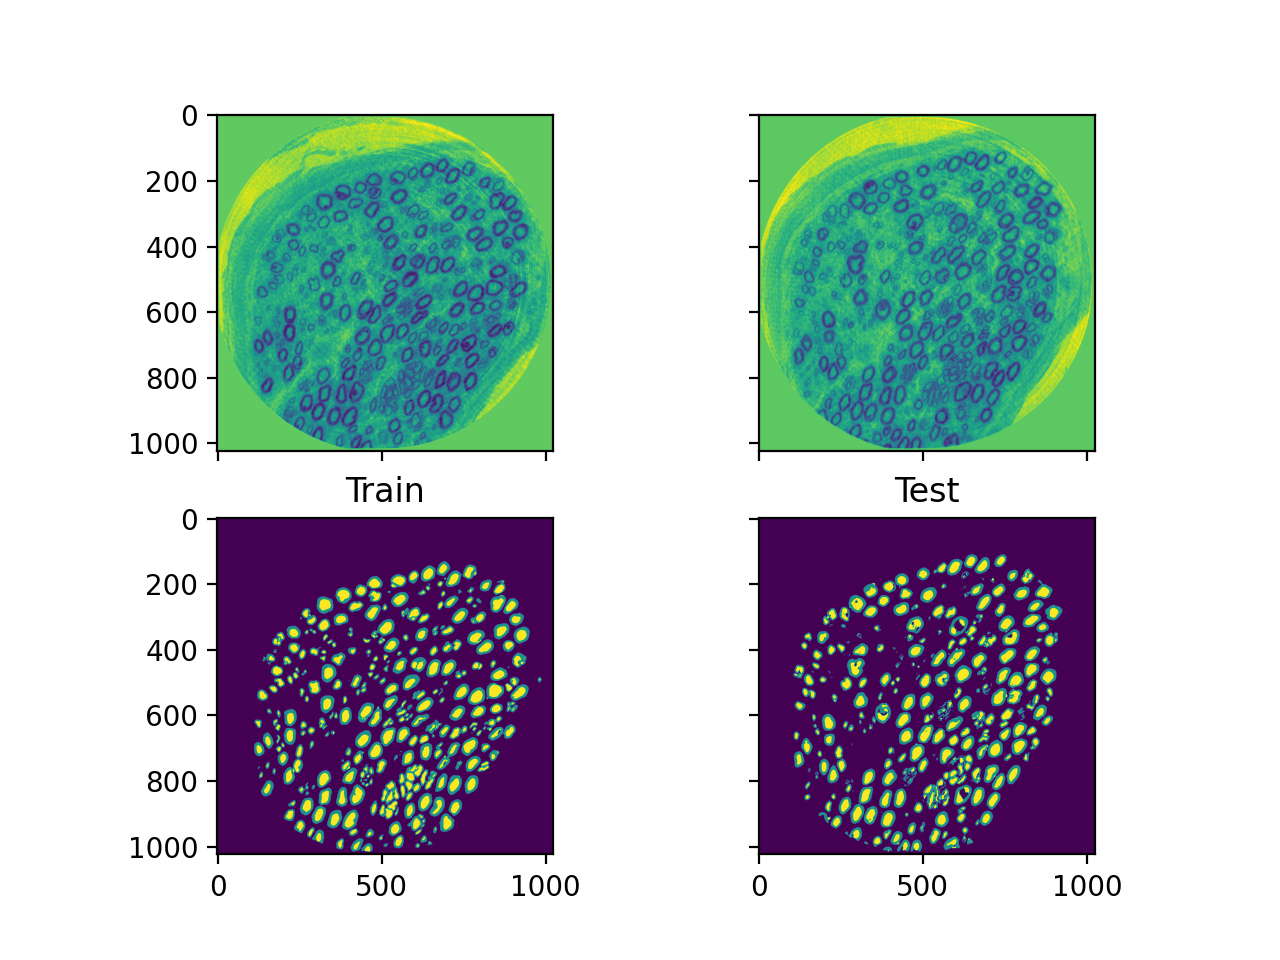

In [9]:
url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/NT2_0512.png'
image_new = np.array(PIL.Image.open(urllib.request.urlopen(url)))

prob_new = model.segment_new(image_new)
seg_new = insegtpy.utils.segment_probabilities(prob_new)

fig, ax = plt.subplots(2, 2, sharex = True, sharey = True )
ax[0][0].imshow(image)
ax[1][0].imshow(seg)
ax[1][0].set_title('Train')
ax[0][1].imshow(image_new)
ax[1][1].imshow(seg_new)
ax[1][1].set_title('Test')
plt.show()